### Generating Overfit Tree Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [14]:
data = pd.read_csv('data/Whickham.txt')



In [15]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define which columns are categorical
categorical_features = data.drop('outcome', axis = 1).select_dtypes(include=['object']).columns


# Define the OneHotEncoder
onehotencoder = OneHotEncoder()

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('smoker', onehotencoder, categorical_features)
    ],
    remainder='passthrough'
)

# Apply the transformation
data_transformed = preprocessor.fit_transform(data)

# Convert the result back to a DataFrame
data_transformed = pd.DataFrame(data_transformed, columns=preprocessor.get_feature_names_out())
data_transformed

,smoker__smoker_No,smoker__smoker_Yes,remainder__outcome,remainder__age
0,0.0,1.0,Alive,23
1,0.0,1.0,Alive,18
2,0.0,1.0,Dead,71
3,1.0,0.0,Alive,67
4,1.0,0.0,Alive,64
...,...,...,...,...
1309,0.0,1.0,Alive,35
1310,1.0,0.0,Alive,33
1311,0.0,1.0,Alive,21
1312,1.0,0.0,Alive,46


In [28]:
X = data_transformed[['smoker__smoker_No', 'smoker__smoker_Yes', 'remainder__age' ]]
y = data['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

max_depths = np.arange(1, 21)
train_accuracies = []
test_accuracies = []

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Calculate accuracy on training set
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    train_accuracies.append(train_accuracy)
    
    # Calculate accuracy on test set
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    test_accuracies.append(test_accuracy)
print(test_accuracies)

[0.8632911392405064, 0.8632911392405064, 0.8582278481012658, 0.8632911392405064, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265, 0.8658227848101265]


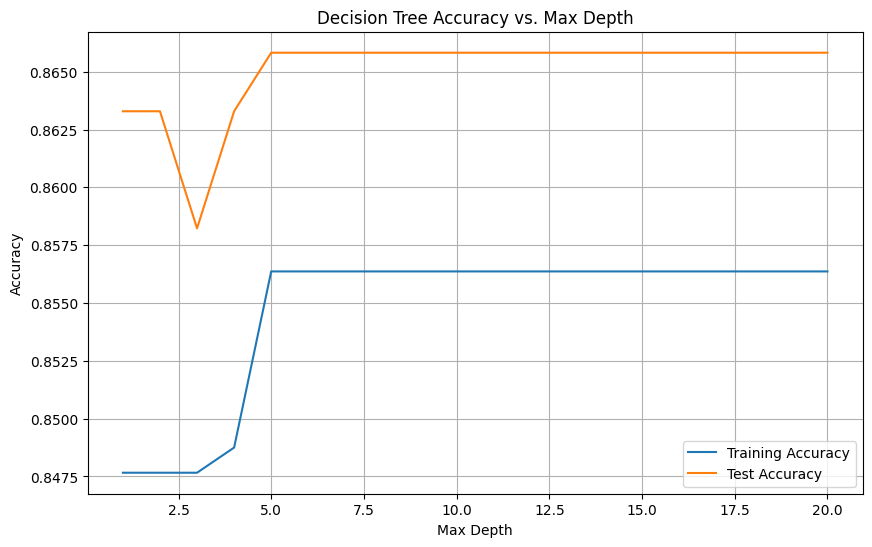

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

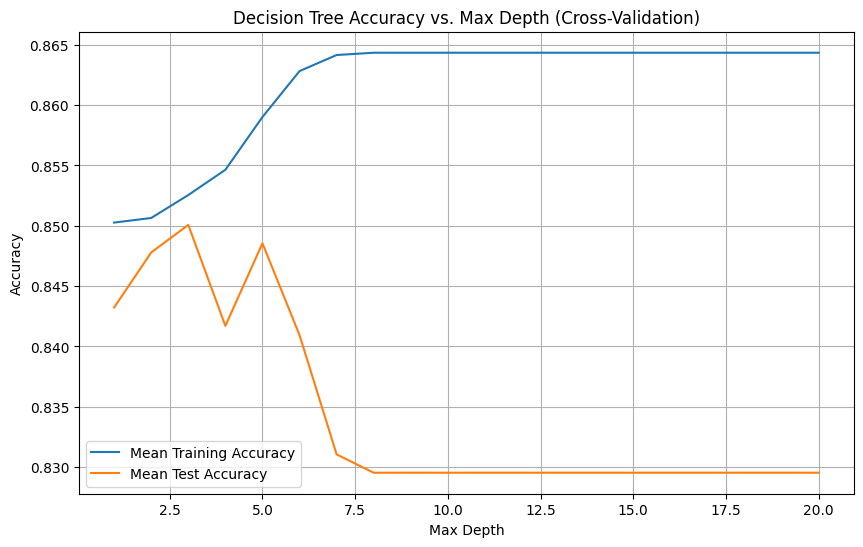

In [33]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
depth_range = np.arange(1, 21)
train_accs = np.zeros((kf.get_n_splits(), len(depth_range)))
test_accs = np.zeros((kf.get_n_splits(), len(depth_range)))

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for j, max_depth in enumerate(depth_range):
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        clf.fit(X_train, y_train)
        
        train_accs[i, j] = accuracy_score(y_train, clf.predict(X_train))
        test_accs[i, j] = accuracy_score(y_test, clf.predict(X_test))

mean_train_accs = train_accs.mean(axis=0)
mean_test_accs = test_accs.mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(depth_range, mean_train_accs, label='Mean Training Accuracy')
plt.plot(depth_range, mean_test_accs, label='Mean Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth (Cross-Validation)')
plt.legend()
plt.grid(True)
plt.show()
